In [21]:
import numpy
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt

In [41]:
def beam_plot(path_dir='', axis='x', dirc='ccw', param0=[]):
    bar = 5 
    file = path_dir.split('_')[2]
    d = numpy.loadtxt('./data/'+path_dir+'/{0}_{1}_{2}.csv'.format(
        file, axis, dirc), delimiter=',')
    t = d[:,0]
    x = d[:,1]
    y = d[:,2]

    def row_function(x):
        return param[0][0] * numpy.exp( -2 * (x - param[0][1])**2 / param[0][2]**2)
    
    def _fitting_function(param, x, y):
        def _function(x):
            return param[0] * numpy.exp(-2 * (x - param[1])**2 / param[2]**2) + param[3]
        
        _y = [scipy.integrate.quad(_function, i-bar/2, i+bar/2)[0] for i in x]
        residual = y - _y
        return residual
    
    def fitting_function(x):
        def function(x):
            return param[0][0] * numpy.exp( -2 * (x - param[0][1])**2 / param[0][2]**2) + param[0][3]
        
        ret = [scipy.integrate.quad(function, i-bar/2, i+bar/2)[0] for i in x]
        return ret
    
    param = scipy.optimize.leastsq(_fitting_function, param0, args=(x, y))
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, row_function(x))
    # plt.plot(x, fitting_function(x), color='orange', linewidth=2, label='Gaussian')
    # plt.plot(x, y, color='dodgerblue', linewidth=0, marker='.',
            # markersize=9, markeredgecolor='dodgerblue', label='Measure')
    plt.xlabel('{0}-axis (mm)'.format(axis), size=20)
    plt.ylabel('Power (dBm)', size=20)
    plt.tick_params(labelsize=16)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=18)
    # plt.text(0, min(fitting_function(x))+1.15,
             # '{0}c={1:.3f}'.format(axis, param[0][1]), fontsize=20)
    # plt.text(0, min(fitting_function(x))+1,
             # 'Beamsize={0:.3f}'.format(param[0][2]), fontsize=20)
    plt.title('BeamPattern Measurement \n {0}_{1}_{2}'.format(file, axis, dirc), size=24)
    # plt.savefig('./data/'+path_dir+'/{0}_{1}_{2}.png'.format(file, axis, dirc))
    print(param[0][0], param[0][1], param[0][2], param[0][3])
    print(param)
    plt.show()

In [42]:
path_dir = 'data_at_20180412-230705'

/home/amigos/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


0.353461339487 131.216378562 15.1327813667 2.03097909268
(array([   0.35346134,  131.21637856,   15.13278137,    2.03097909]), 1)


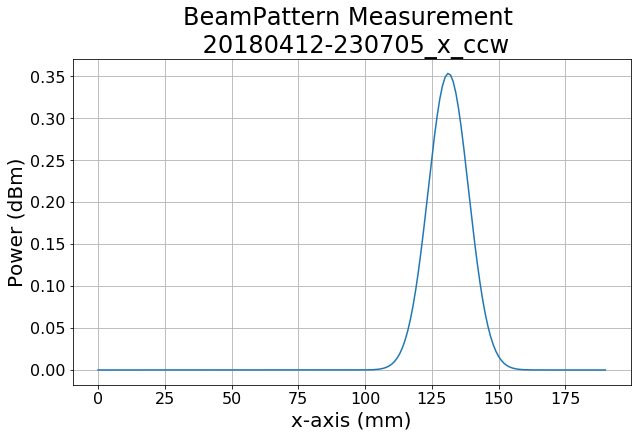

0.354356953519 131.196174229 14.8915831834 2.029900217
(array([   0.35435695,  131.19617423,   14.89158318,    2.02990022]), 1)


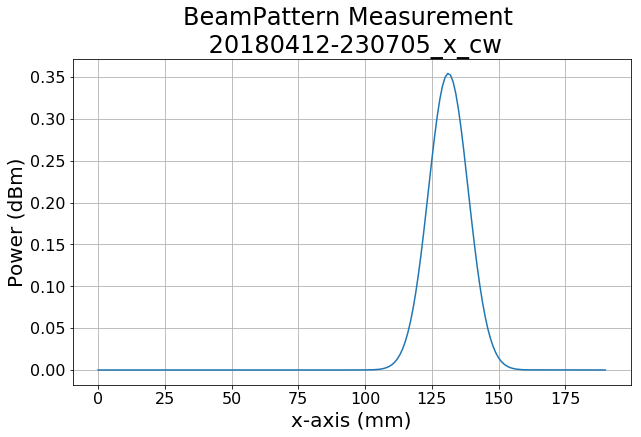

0.361344350001 122.533933882 15.1106918458 2.03977120611
(array([   0.36134435,  122.53393388,   15.11069185,    2.03977121]), 1)


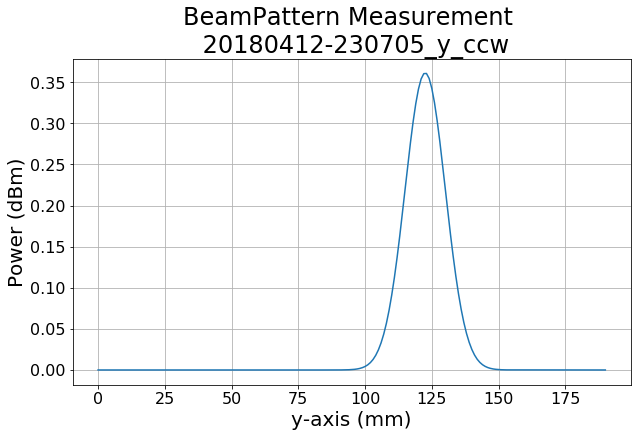

0.357261694169 122.471162225 14.9843099712 2.03851103877
(array([   0.35726169,  122.47116223,   14.98430997,    2.03851104]), 1)


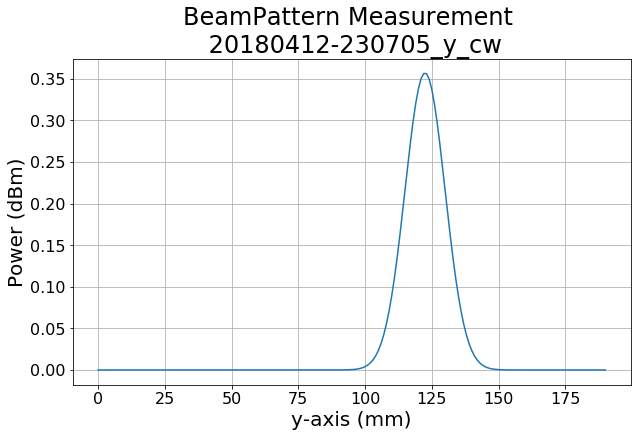

In [43]:
# x-ccw
beam_plot(path_dir, axis='x', dirc='ccw', param0=[1.5, 130, 14, 10])
# x-cw
beam_plot(path_dir, axis='x', dirc='cw', param0=[1.5, 130, 14, 10])
# y-ccw
beam_plot(path_dir, axis='y', dirc='ccw', param0=[1.5, 120, 14, 10])
# y-cw
beam_plot(path_dir, axis='y', dirc='cw', param0=[1.5, 120, 14, 10])

In [66]:
def function(x):
    A = 0.353461339487
    B = 131.216378562
    C = 15.1327813667
    D = 2.03097909
    return A * numpy.exp( -2 * (x - B)**2 / C**2)

In [70]:
bar = 5
B = 131.216378562
R0 = scipy.integrate.quad(function, B-bar/2, B+bar/2)[0]
print(R0)

1.735670411992361


In [71]:
lim = 10000
Ra = scipy.integrate.quad(function, B-lim, B+lim)[0]
print(Ra)

6.703793298939702


In [72]:
10**(R0/10) * 100 / 10**(Ra/10)

31.855740970408174